# Clustering Algorithm in Python

In [1]:
# packages used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Set styles
sns.set(style="whitegrid")
np.random.seed(42)

In [3]:
# Loading dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
df = pd.read_csv(url).drop(columns=['Address']).dropna()

# Feature scaling (excluding 'Customer Id')
X = StandardScaler().fit_transform(df.iloc[:, 1:])

In [5]:
# dataset explanation
df.describe(include='all')

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,430.461429,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,243.323524,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,222.750000,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,433.500000,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,642.250000,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


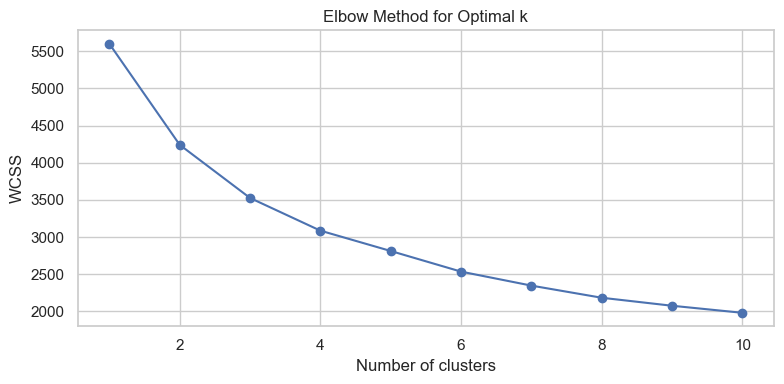

In [6]:
def plot_elbow(X):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8,4))
    plt.plot(range(1,11), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.tight_layout()
    plt.show()

plot_elbow(X)

In [7]:
# Fit and assign K-Means labels
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)

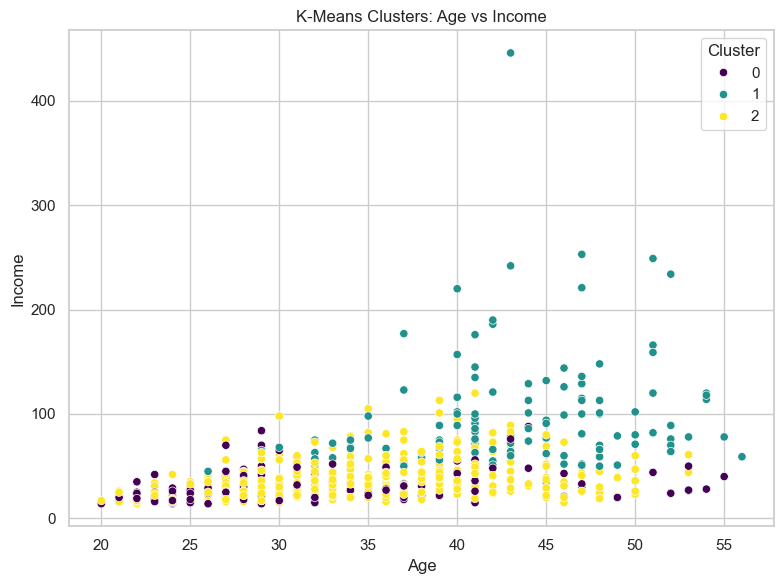

In [8]:
# %%
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Cluster_KMeans', palette='viridis')
plt.title('K-Means Clusters: Age vs Income')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

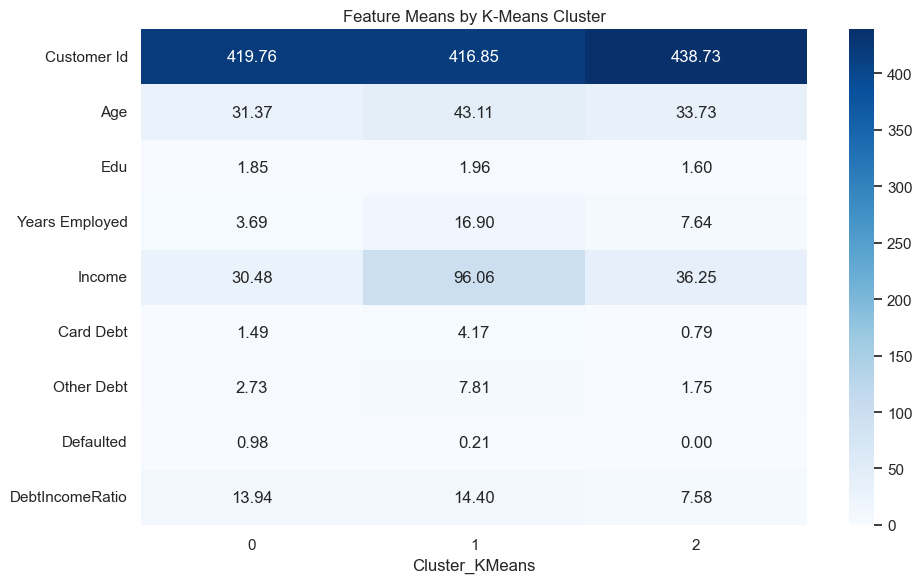

In [9]:
cluster_means = df.groupby('Cluster_KMeans').mean(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_means.T, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title('Feature Means by K-Means Cluster')
plt.tight_layout()
plt.show()

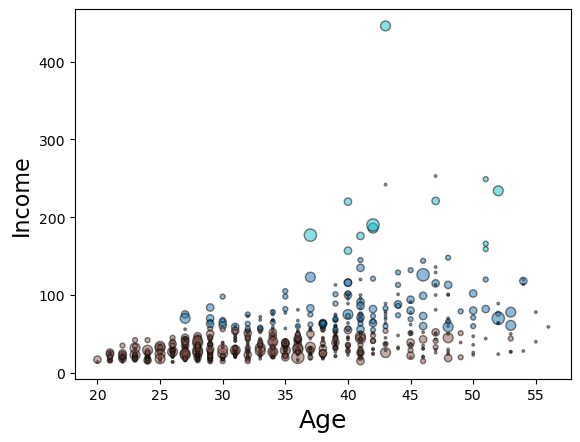

In [16]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()